In [2]:
import os
import cv2
import xml.etree.ElementTree as ET 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomHeight, RandomWidth

In [3]:
def parse_annotation(annotation_path):
    tree = ET.parse(annotation_path)
    root = tree.getroot()
    
    bndbox = root.find('.//bndbox')
    xmin = int(bndbox.find('xmin').text)
    ymin = int(bndbox.find('ymin').text)
    xmax = int(bndbox.find('xmax').text)
    ymax = int(bndbox.find('ymax').text)
    
    return (xmin, ymin, xmax, ymax)

In [14]:
def load_images_from_folders(*folders):   #function for extracting images from multiple folders and labelling them
    all_images = []
    all_labels = []
    for i, folder in enumerate(folders):
        labels = []
        images = []
        folder = folder.replace("\\", "/")
        annotation_classes = folder.split("/")[1]
        ann_path = os.path.join('annotations', annotation_classes)
        for image, annotation in zip(os.listdir(folder), os.listdir(ann_path)):
            img_path = os.path.join(folder, image)
            ann_path = os.path.join('annotations',annotation_classes, annotation)
            bndbox = parse_annotation(ann_path)
            xmin, ymin, xmax, ymax = bndbox
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = img[ymin:ymax, xmin:xmax]
            img = cv2.resize(img, (250, 250))
            images.append(img)
        labels.extend(np.full(len(images), i))
        all_images.extend(images)
        all_labels.extend(labels)
    return np.array(all_images), np.array(all_labels) 

In [15]:
images, labels = load_images_from_folders(r"images\n02085620-Chihuahua",
                                          r"images\n02106550-Rottweiler",
                                          r"images\n02110958-pug",
                                          r"images\n02113978-Mexican_hairless",
                                          r"images\n02116738-African_hunting_dog",
                                          r"images\n02106662-German_shepherd",
                                          r"images\n02098413-Lhasa",
                                          r"images\n02113624-toy_poodle",
                                          r"images\n02102973-Irish_water_spaniel",
                                          r"images\n02108089-boxer")

In [16]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train = X_train / 255.0 
X_test = X_test / 255.0

In [17]:
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)

In [18]:
model = models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(data_augmentation.flow(X_train, y_train, batch_size=32), epochs=40, validation_data=(X_test, y_test))

c:\Users\heman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40


c:\Users\heman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 28s 616ms/step - accuracy: 0.1246 - loss: 2.3677 - val_accuracy: 0.1667 - val_loss: 2.2266
Epoch 2/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 26s 606ms/step - accuracy: 0.1959 - loss: 2.1582 - val_accuracy: 0.2685 - val_loss: 2.0024
Epoch 3/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 26s 600ms/step - accuracy: 0.2564 - loss: 1.9970 - val_accuracy: 0.3025 - val_loss: 1.9718
Epoch 4/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 26s 606ms/step - accuracy: 0.3050 - loss: 1.9239 - val_accuracy: 0.3333 - val_loss: 1.9355
Epoch 5/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 26s 609ms/step - accuracy: 0.3637 - loss: 1.8223 - val_accuracy: 0.3179 - val_loss: 1.9298
Epoch 6/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 26s 608ms/step - accuracy: 0.3766 - loss: 1.7656 - val_accuracy: 0.3395 - val_loss: 1.8575
Epoch 7/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 26s 607ms/step - accuracy: 0.3942 - loss: 1.7016 - val_accuracy: 0.3117 - val_loss: 1.9240
Epoch 8/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 26s 607ms/step - accuracy: 0.4122 - loss: 1.6618 - val_accuracy: 0.382

In [8]:
from tensorflow.keras.models import load_model
model = load_model('multiclassification_model_with_annotation.keras')

In [64]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(data_augmentation.flow(X_train, y_train, batch_size=32), epochs=5, validation_data=(X_test, y_test))

Epoch 1/5


c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.6331 - loss: 1.0091 - val_accuracy: 0.5748 - val_loss: 1.2201
Epoch 2/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.6778 - loss: 0.9129 - val_accuracy: 0.5982 - val_loss: 1.2302
Epoch 3/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.6850 - loss: 0.9467 - val_accuracy: 0.5718 - val_loss: 1.3088
Epoch 4/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.7227 - loss: 0.8151 - val_accuracy: 0.6012 - val_loss: 1.2405
Epoch 5/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.7553 - loss: 0.7253 - val_accuracy: 0.5953 - val_loss: 1.2308


In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(data_augmentation.flow(X_train, y_train, batch_size=32), epochs=5, validation_data=(X_test, y_test))

Epoch 1/5


c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.6595 - loss: 0.9764 - val_accuracy: 0.6041 - val_loss: 1.1958
Epoch 2/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.7007 - loss: 0.8895 - val_accuracy: 0.5748 - val_loss: 1.2668
Epoch 3/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.7551 - loss: 0.8009 - val_accuracy: 0.5660 - val_loss: 1.2490
Epoch 4/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.7181 - loss: 0.7601 - val_accuracy: 0.5982 - val_loss: 1.2693
Epoch 5/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.7367 - loss: 0.7796 - val_accuracy: 0.6217 - val_loss: 1.2295


In [11]:
model.evaluate(X_train, y_train)

43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 303ms/step - accuracy: 0.7923 - loss: 0.6159


[0.6255252361297607, 0.7910557389259338]

In [10]:
model.evaluate(X_test, y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 266ms/step - accuracy: 0.6204 - loss: 1.1558


[1.1754056215286255, 0.6099706888198853]

In [12]:
named_labels = ["Afghan_hound","Rottweiler","pug","Mexican_hairless","African_hunting_dog","German_shepherd","Lhasa","toy_poodle","Irish_water_spaniel","boxer"]
def show_prediction(index):
    predicted_index = np.argmax(model.predict(X_test[[index]]))
    plt.imshow(X_test[index])
    plt.title('Label: ' + named_labels[predicted_index])
    plt.axis('off')
    plt.show()  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


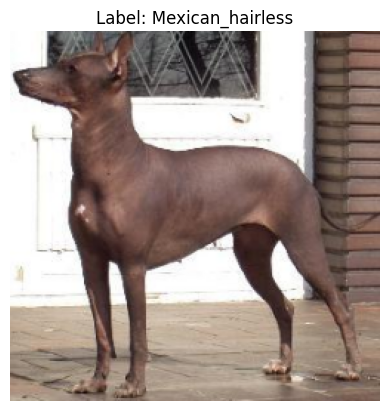

In [22]:
random = np.random.randint(340)
show_prediction(random)